1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


/tmp/ipykernel_8872/1757939655.py:37: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  hist_integral   = integrate.trapz(counts, centers)
/tmp/ipykernel_8872/1757939655.py:38: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  sum_integral    = integrate.trapz(SUM, xrange)


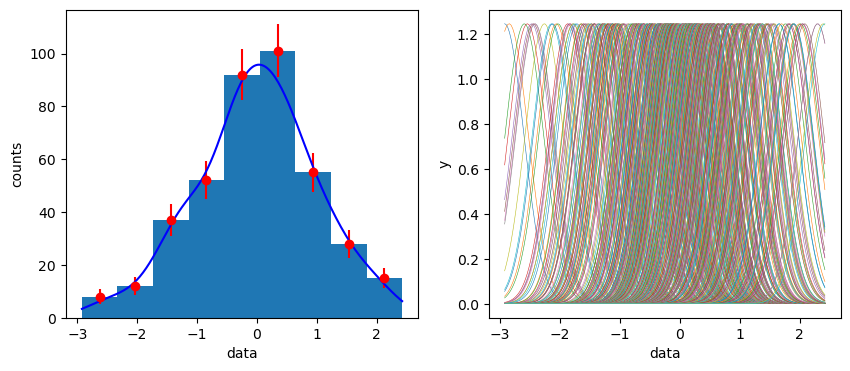

In [106]:
import pandas as pd
import numpy as np
from   scipy import stats
from   scipy import integrate
import seaborn
import matplotlib.pyplot as plt
#
fis, axes = plt.subplots(1, 2, figsize = (10, 4))
#
average = 0.0
st_dev  = 1.0
N       = 400
x       = np.sort(np.random.normal(average, st_dev, N))
k       = int(np.log(N)/np.log(2) + 1)  # Sturges' Rule
#
counts, bins, _ = axes[0].hist(x, bins = k)
#axes[0].title("histogram of normally distributed data")
axes[0].set_xlabel("data")
axes[0].set_ylabel("counts")
centers = (bins[:-1] + bins[1:]) / 2
axes[0].errorbar(centers, counts, yerr = np.sqrt(counts), fmt = "o", c = "r")
#
STD      = 1.06 * x.std() * (x.size ** (- 1 / 5))
n_points = 200
xrange   = np.linspace(x.min(), x.max(), n_points)
norms    = [stats.norm(loc = x[i], scale = STD).pdf(xrange) for i in range(x.size)]
for norm in norms:
    axes[1].plot(xrange, norm, linewidth = 0.4)
    #
#####
#
axes[1].set_xlabel("data")
axes[1].set_ylabel("y")
#
# normalize gaussian
SUM             = np.array(norms).sum(axis = 0)
hist_integral   = integrate.trapz(counts, centers)
sum_integral    = integrate.trapz(SUM, xrange)
normalized_norm = SUM * (hist_integral / sum_integral)
axes[0].plot(xrange, normalized_norm, c = "b")
#
plt.gca().set_yticks(np.arange(0, 1.4, 0.2))
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

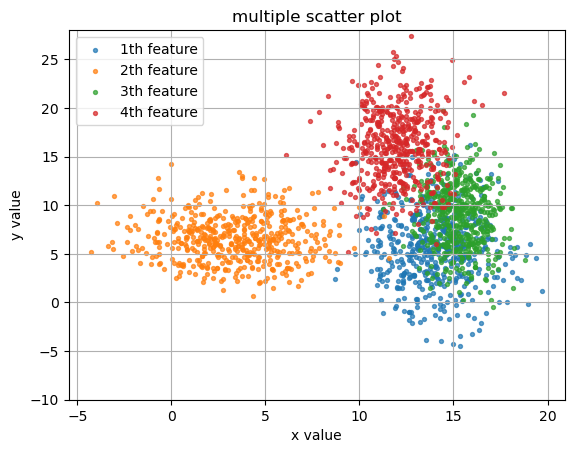

In [108]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
choice = 4
#
def make_datasets(N = 500, N_features = 2):
    def make_2d_dataframe(mean, std):
        x = np.random.normal(mean[0], std[0], N)
        y = np.random.normal(mean[1], std[1], N)
        return np.array([x, y]).T
        #
    #####
    #
    # take parameters
    dimension = 2
    means     = np.random.uniform(0.1, 20, (N_features, dimension))
    stds      = np.random.uniform(0.1, 4,  (N_features, dimension))
    #
    # make dataframe
    points    = [make_2d_dataframe(i, j) for i, j in zip(means, stds)]
    dataset   = {category : data for category, data in zip(range(N_features), points)}
    return dataset
    #
#####
dataset = make_datasets(N_features = choice)
#
#
for i in range(len(dataset.keys())):
    plt.scatter(dataset[i].T[0], dataset[i].T[1], label = f"{i + 1}th feature", alpha = 0.7, s = 8)
    #
#####
plt.title("multiple scatter plot")
plt.legend()
plt.xlabel("x value")
plt.ylabel("y value")
plt.ylim(-10, 28)
plt.grid()
plt.show()

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

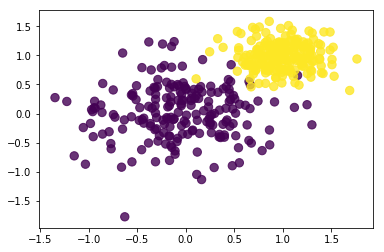

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [139]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2025-02-10 19:32:32--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.72.18, 2620:100:601c:18::a27d:612
Connessione a www.dropbox.com (www.dropbox.com)|162.125.72.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [segue]
--2025-02-10 19:32:33--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc1b6c35451c3d49db2b0522b347.dl.dropboxusercontent.com/cd/0/inline/Cj01SwXA6KV6xZ-htFJyIghTMDkWHjPHfYnf6W5PSOqUTSyij9oYPLDJ8pbO3zpEoCWDR7ehb-KOfzr84I_uXTdeCoFtrsSXik9yKgypE5m3fp0AeszxRzn87Qw2buf31Wg/file# [segue]
--2025-02-10 19:32:34--  https://uc1b6c35451c3d49db2b0522b347.dl.dropboxusercon

In [63]:
data = pd.DataFrame(np.load(open("residuals_261.npy", "rb"), allow_pickle = True).item())
data = data[data["residuals"].abs() < 2]
dis  = data["distances"]
res  = data["residuals"]

In [65]:
regress = stats.linregress(x = dis, y = res)
slope, intercept = regress[0:2]

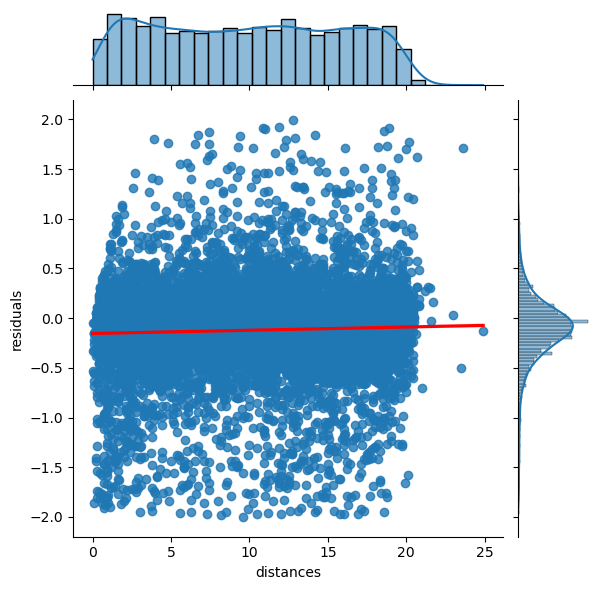

In [174]:
seaborn.jointplot(x = dis, y = res, kind = "reg", line_kws = {"color" : "r"})

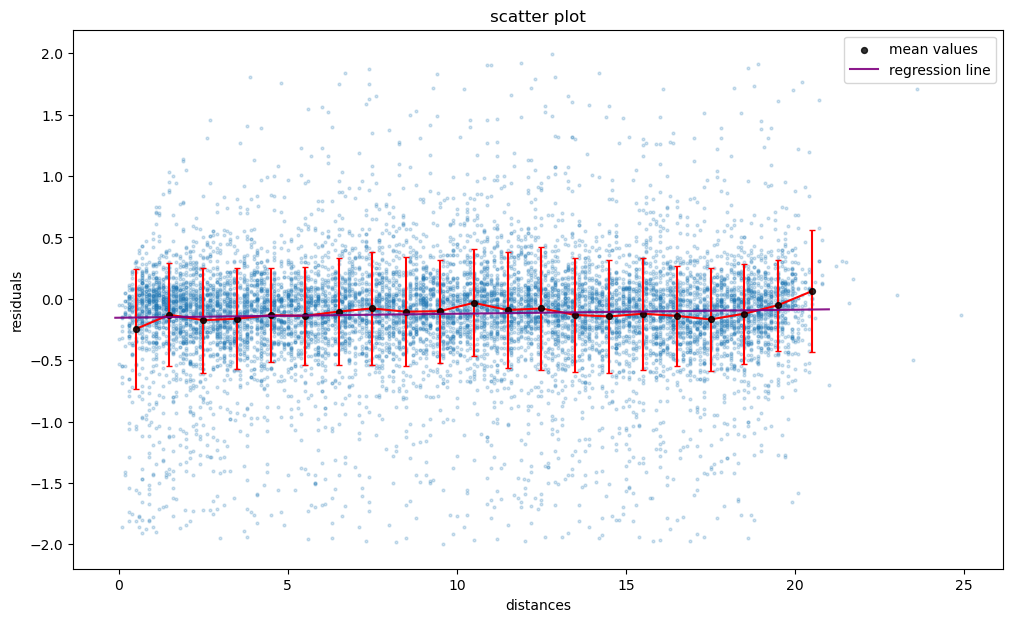

In [170]:
bin_number = int(dis.shape[0] ** (1 / 3))
x    = np.linspace(0, 20, bin_number)
r    = ((x[1] - x[0]) / 2)
x    = x + r
#
# return filtered data:
filter_data = lambda i: data[(data["distances"] < x[i] + r) & (data["distances"] > x[i] - r)]["residuals"]
#
# find y and error associated with it
y    = np.array([filter_data(i).mean() for i in range(x.shape[0])])
erry = np.array([filter_data(i).std()  for i in range(x.shape[0])])
#
# build regression line:
xr = np.linspace(-0.1, 21, 200)
yr = (xr * slope) + intercept
#
# plotting
plt.figure(figsize = (12, 7))
plt.scatter(dis, res, alpha = 0.2, s = 4)
plt.errorbar(x, y, yerr = erry, c = "red", capsize = 2)
plt.scatter(x, y, c = "black", alpha = 0.8, s = 18, zorder = 3, label = "mean values")
plt.plot(xr, yr, "."c = "purple", alpha = 0.9, zorder = 4, label = "regression line")
plt.title("scatter plot")
plt.xlabel("distances")
plt.ylabel("residuals")
plt.legend()
plt.show()